# **Лабораторная работа №2. Деревья решений для задач классификации.**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from graphviz import Source
from sklearn import tree

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-full.csv', decimal = ',', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# проверю, есть ли пропущенные значения

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df['y'] = np.where(df['y'] == 'yes', 1, 0)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [ ]:
# преобразую категориальные признаки с помощью метода LabelEncoder

from sklearn import preprocessing
label = preprocessing.LabelEncoder()

df['job']= label.fit_transform(df['job'])
df['marital']= label.fit_transform(df['marital'])
df['education']= label.fit_transform(df['education'])
df['default']= label.fit_transform(df['default'])
df['housing']= label.fit_transform(df['housing'])
df['loan']= label.fit_transform(df['loan'])
df['contact']= label.fit_transform(df['contact'])
df['month']= label.fit_transform(df['month'])
df['poutcome']= label.fit_transform(df['poutcome'])

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
#  разделяю предикоторы и отклик

X = df.iloc[:, :-1].values
y = df.iloc[:, 16].values

In [ ]:
#  разделяю на обучающую и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [ ]:
#  Задаем параметры модели
#  Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               # максимальное число конечных узлов (сейчас - без ограничений)
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в потомке(может быть долей)
                               min_samples_leaf=8,
                               # минимальное число элементов в листе (может быть долей)
                               # min_samples_leaf=5,
                               # минимальное значение уменьшения загрязнения (impurity)
                               min_impurity_decrease=0.001,
                               # веса классов (можно дополнительно штрафовать за ошибку
                               # в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # Используем, если задаем веса классов
                               min_weight_fraction_leaf=0,
                               # Рекомендация: не менять.
                               # предварительная сортировка.
                               # ускоряет обучение на данных малого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               #  presort=False,
                               # Рекомендация: не менять.
                               # какое расщепление выбирать? ('best' или 'random')
                               splitter='best',
                               # Рекомендация: не менять. Важно в RandomForest и так далее
                               # Перебирать все переменные
                               max_features = None)

# Обучаем модель
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.001,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0, random_state=42)

In [ ]:
print("train accuracy:", model.score(X_train, y_train))
print("test accuracy:", model.score(X_test, y_test))

train accuracy: 0.8999702882044172
test accuracy: 0.8939008042895442


**Подбор гиперпараметров с помощью GridSearchCV и StratifiedKFold**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 10, 20]
min_samples_split = [2, 4, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
max_features = [2, 4, 6, 8]

cv = StratifiedKFold(10)

decision_tree = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(estimator=decision_tree, cv=cv,
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features))
grid_dt.fit(X_train, y_train)
print("best score: ", grid_dt.best_score_)
print("best param: ", grid_dt.best_params_)
print("test score:", grid_dt.score(X_test, y_test))

best score:  0.9002673060307022
best param:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
test score: 0.8968498659517427


In [ ]:
model_2 = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=5,
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=2,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=4,
                               min_impurity_decrease=0.001,
                               class_weight=None,
                               min_weight_fraction_leaf=0,
                               splitter='best',
                               max_features = 8)

model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=8, min_impurity_decrease=0.001,
                       min_samples_leaf=4, min_weight_fraction_leaf=0,
                       random_state=42)

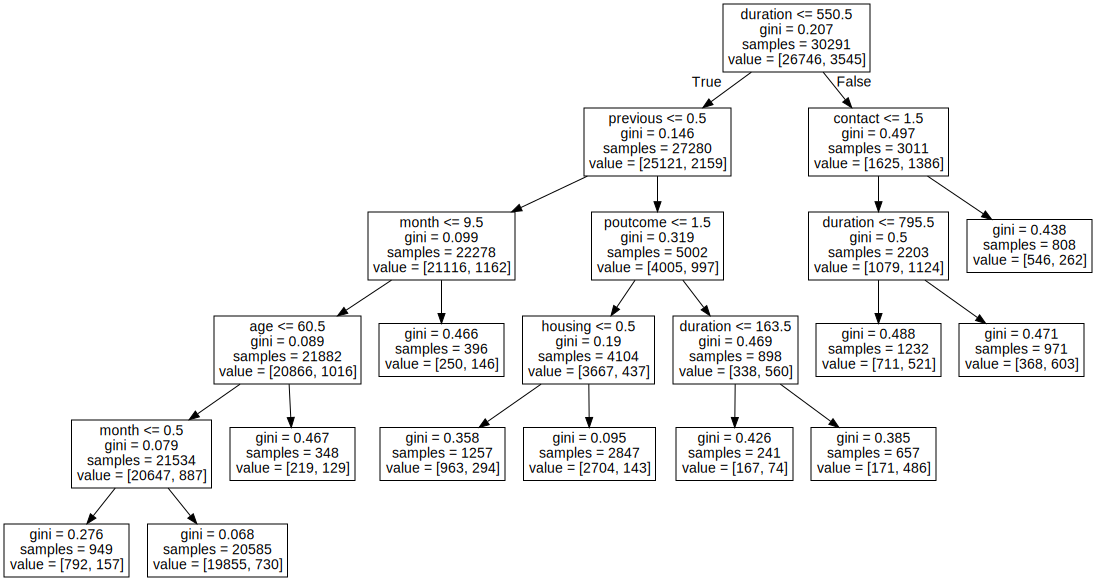

In [ ]:
Source( tree.export_graphviz(model_2, out_file=None, feature_names=df.iloc[:, :-1].columns))